In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [63]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [64]:
#normalising the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [65]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

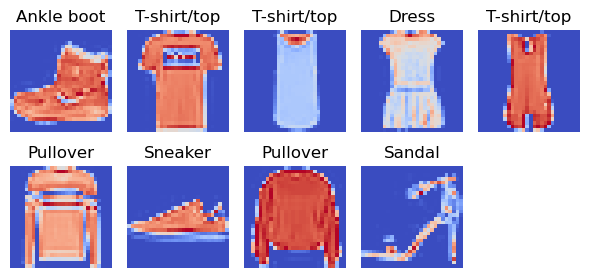

In [66]:
#displaying some sample images from the training dataset
num_samples = 9 
plt.figure(figsize=(6, 3)) 

for i in range(num_samples):
    plt.subplot(2, 5, i + 1) 
    plt.imshow(X_train[i], cmap='coolwarm') 
    plt.title(class_names[y_train[i]])
    plt.axis('off') 

plt.tight_layout()
plt.show()

In [67]:
import numpy as np

def print_fashion_mnist_image(matrix):
    """Prints a Fashion MNIST image as pixel values."""
    for row in matrix:
        print("  ".join(f"{int(pixel):3}" for pixel in row))  
sample_index = np.random.randint(len(X_train))
print(f"Displaying image at index: {sample_index}\n")
print_fashion_mnist_image(X_train[sample_index])

Displaying image at index: 44735

  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    

In [68]:
from tensorflow.keras.layers import Flatten, Dense, Input
model = Sequential([
    Input(shape=(28, 28)),  
    Flatten(), 
    Dense(128, activation='sigmoid'),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])


In [69]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs=6, validation_split=0.2)


Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7504 - loss: 0.7228 - val_accuracy: 0.8263 - val_loss: 0.4504
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8543 - loss: 0.3989 - val_accuracy: 0.8605 - val_loss: 0.3841
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8725 - loss: 0.3490 - val_accuracy: 0.8765 - val_loss: 0.3455
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8799 - loss: 0.3274 - val_accuracy: 0.8748 - val_loss: 0.3461
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8875 - loss: 0.3079 - val_accuracy: 0.8783 - val_loss: 0.3283
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8924 - loss: 0.2903 - val_accuracy: 0.8700 - val_loss: 0.3465


In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
train_acc = history.history['accuracy'][-1]
print(f"Training Accuracy from last epoch: {train_acc:.4f}")

Test Loss: 0.3712
Test Accuracy: 0.8630
Training Accuracy from last epoch: 0.8923


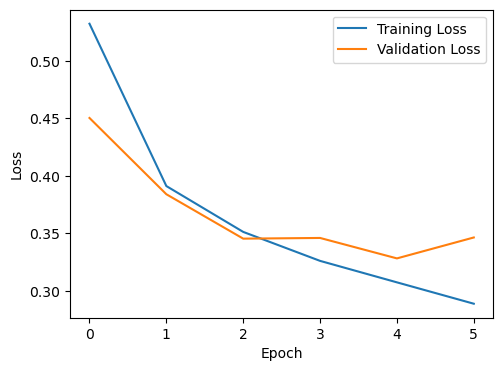

In [72]:
#plotting the training and validation loss for adam optimizer
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

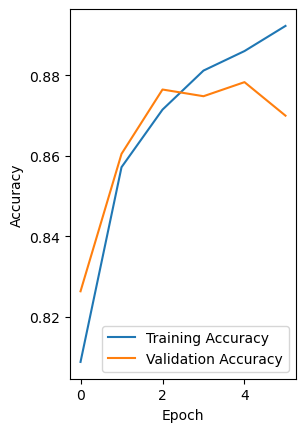

In [73]:
#plotting the training and validation accuracy for adam optimizer
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


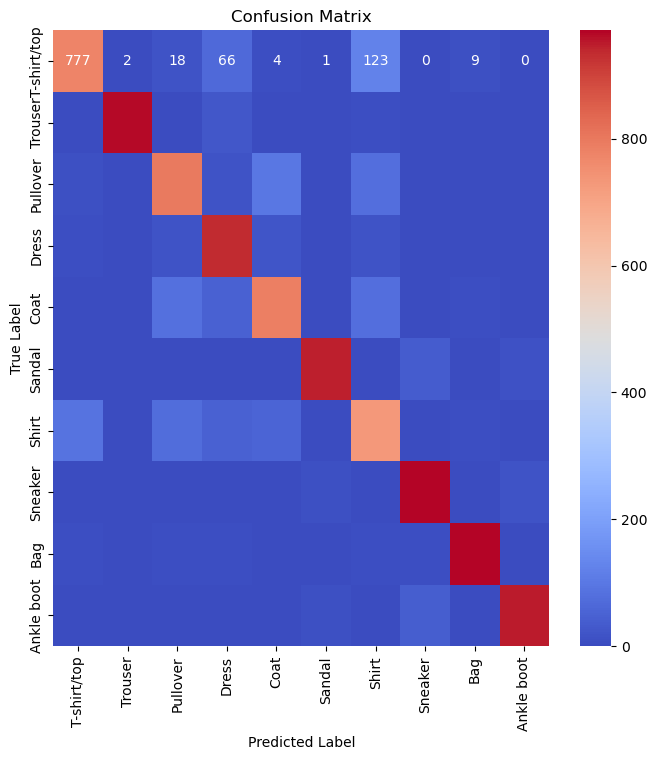

In [85]:
#displaying the confusion matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [75]:
#trying with SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2)

Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9067 - loss: 0.2495 - val_accuracy: 0.8888 - val_loss: 0.3043
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9116 - loss: 0.2376 - val_accuracy: 0.8908 - val_loss: 0.3029
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9136 - loss: 0.2399 - val_accuracy: 0.8894 - val_loss: 0.3024
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9126 - loss: 0.2330 - val_accuracy: 0.8911 - val_loss: 0.3019
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9111 - loss: 0.2373 - val_accuracy: 0.8904 - val_loss: 0.3017
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9136 - loss: 0.2307 - val_accuracy: 0.8898 - val_loss: 0.3024
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9122 - loss: 0.2361 - val_accuracy: 0.8912 - val_loss: 0.3015
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9131 - loss: 0.2284 - val_accu

In [77]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
train_acc = history.history['accuracy'][-1]
print(f"Training Accuracy from last epoch: {train_acc:.4f}")

Test Loss: 0.3299
Test Accuracy: 0.8826
Training Accuracy from last epoch: 0.9141


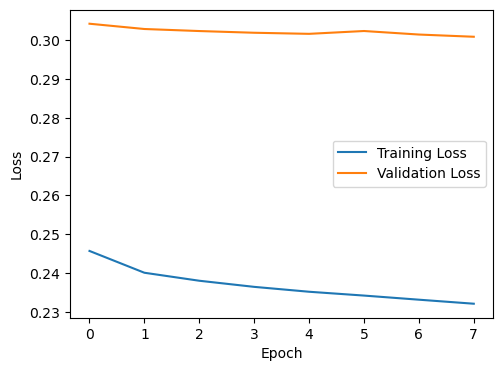

In [78]:
#plotting the training and validation loss for SDG optimizer
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

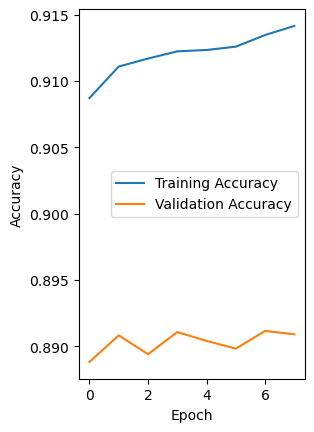

In [79]:
#plotting the training and validation Accuracy for SDG optimizer
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
#trying with RMSprop optimizer
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
history = model.fit(X_train, y_train, epochs=9, validation_split=0.2)

Epoch 1/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8993 - loss: 0.2732 - val_accuracy: 0.8751 - val_loss: 0.3532
Epoch 2/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9014 - loss: 0.2619 - val_accuracy: 0.8833 - val_loss: 0.3300
Epoch 3/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9051 - loss: 0.2524 - val_accuracy: 0.8857 - val_loss: 0.3348
Epoch 4/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9100 - loss: 0.2447 - val_accuracy: 0.8924 - val_loss: 0.3173
Epoch 5/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9124 - loss: 0.2343 - val_accuracy: 0.8903 - val_loss: 0.3150
Epoch 6/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9129 - loss: 0.2298 - val_accuracy: 0.8882 - val_loss: 0.3358
Epoch 7/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9179 - loss: 0.2213 - val_accuracy: 0.8899 - val_loss: 0.3265
Epoch 8/9
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9190 - loss: 0.2202 - val_acc

In [82]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
train_acc = history.history['accuracy'][-1]
print(f"Training Accuracy from last epoch: {train_acc:.4f}")

Test Loss: 0.3578
Test Accuracy: 0.8831
Training Accuracy from last epoch: 0.9186


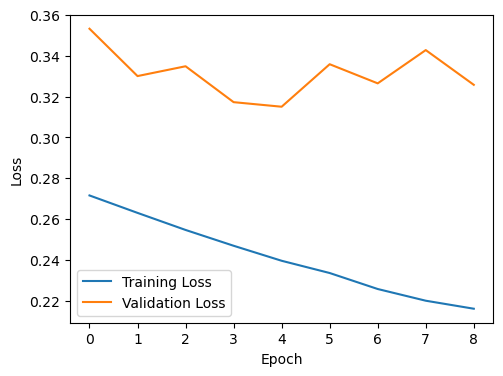

In [83]:
#plotting the training and validation loss for RMSprop optimizer
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

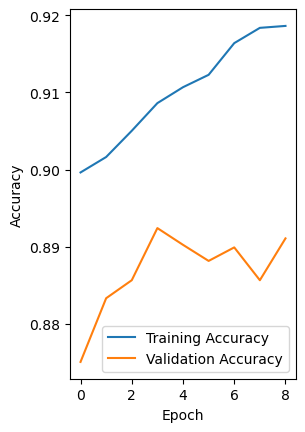

In [84]:
#plotting the training and validation Accuracy for RMSprop optimizer
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()